In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import test_train_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df=pd.read_csv(r'C:\hospital_readmissions_v4_logical.csv')

In [5]:
df

,patient_id,age,gender,blood_pressure (Admission day),Heart rate,cholesterol,bmi,diabetes,hypertension,medication_count,...,Smoking History (num of Years),Alcohol history (num of years),"Severity on Admission (High, Medium, low)","Lifestyle(sedentry, active etc.,)",History of Previous admission (within 90 days),History of Cancer (yes/ No),History of Kidney disease (Yes/ no),Family History of Cancer,Family of history of Kidney disease,Any psychological diagnosis
0,1,74,Other,130/72,95,240,31.5,Yes,No,5,...,0,0,High,Diet food,1,No,Yes,No,No,No
1,2,46,Female,120/92,93,292,36.3,No,No,4,...,11,0,Low,Active,0,No,No,No,No,No
2,3,89,Other,135/78,84,153,30.3,No,Yes,1,...,21,0,High,Exercising frequently,0,No,Yes,No,No,No
3,4,84,Female,123/80,93,153,31.5,No,Yes,3,...,0,0,Low,Active,0,No,No,No,No,No
4,5,32,Other,135/84,85,205,18.4,No,Yes,6,...,0,8,Low,Exercising frequently,0,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29,Male,112/80,79,157,31.4,No,No,4,...,0,0,Medium,Sedentary,3,No,No,Yes,No,No
29996,29997,20,Other,146/83,66,198,30.2,No,Yes,4,...,0,2,High,Exercising frequently,1,No,Yes,No,No,No
29997,29998,40,Other,131/96,98,275,23.3,Yes,Yes,7,...,10,0,Medium,Diet food,0,No,Yes,No,No,No
29998,29999,61,Other,124/75,79,232,34.3,No,No,5,...,0,0,High,Exercising frequently,0,No,No,Yes,No,Yes


In [6]:
df.columns

Index(['patient_id', 'age', 'gender', 'blood_pressure (Admission day)',
       'Heart rate', 'cholesterol', 'bmi', 'diabetes', 'hypertension',
       'medication_count', 'length_of_stay', 'discharge_destination',
       'readmitted_30_days', 'Admission type (ward, ICU)',
       'Admission Diagnosis', 'Surgical problem',
       'Smoking History (num of Years)', 'Alcohol history (num of years)',
       'Severity on Admission (High, Medium, low)',
       'Lifestyle(sedentry, active etc.,)',
       'History of Previous admission (within 90 days)',
       'History of Cancer (yes/ No)', 'History of Kidney disease (Yes/ no)',
       'Family History of Cancer', 'Family of history of Kidney disease',
       'Any psychological diagnosis'],
      dtype='object')

In [7]:
Y=df[["readmitted_30_days"]]
Y

,readmitted_30_days
0,Yes
1,No
2,No
3,No
4,No
...,...
29995,Yes
29996,Yes
29997,No
29998,No


In [8]:
exclude_cols = ['readmitted_30_days']
X= df[[col for col in df.columns if col not in exclude_cols]]
X

,patient_id,age,gender,blood_pressure (Admission day),Heart rate,cholesterol,bmi,diabetes,hypertension,medication_count,...,Smoking History (num of Years),Alcohol history (num of years),"Severity on Admission (High, Medium, low)","Lifestyle(sedentry, active etc.,)",History of Previous admission (within 90 days),History of Cancer (yes/ No),History of Kidney disease (Yes/ no),Family History of Cancer,Family of history of Kidney disease,Any psychological diagnosis
0,1,74,Other,130/72,95,240,31.5,Yes,No,5,...,0,0,High,Diet food,1,No,Yes,No,No,No
1,2,46,Female,120/92,93,292,36.3,No,No,4,...,11,0,Low,Active,0,No,No,No,No,No
2,3,89,Other,135/78,84,153,30.3,No,Yes,1,...,21,0,High,Exercising frequently,0,No,Yes,No,No,No
3,4,84,Female,123/80,93,153,31.5,No,Yes,3,...,0,0,Low,Active,0,No,No,No,No,No
4,5,32,Other,135/84,85,205,18.4,No,Yes,6,...,0,8,Low,Exercising frequently,0,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29,Male,112/80,79,157,31.4,No,No,4,...,0,0,Medium,Sedentary,3,No,No,Yes,No,No
29996,29997,20,Other,146/83,66,198,30.2,No,Yes,4,...,0,2,High,Exercising frequently,1,No,Yes,No,No,No
29997,29998,40,Other,131/96,98,275,23.3,Yes,Yes,7,...,10,0,Medium,Diet food,0,No,Yes,No,No,No
29998,29999,61,Other,124/75,79,232,34.3,No,No,5,...,0,0,High,Exercising frequently,0,No,No,Yes,No,Yes


In [9]:
X = pd.get_dummies(X, drop_first=True)
Y=Y.values.ravel()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [10]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [11]:
y_pred=model.predict(x_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      8685
         Yes       0.93      0.88      0.91      1215

    accuracy                           0.98      9900
   macro avg       0.96      0.94      0.95      9900
weighted avg       0.98      0.98      0.98      9900



In [13]:
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))

ROC-AUC: 0.9962406684814412


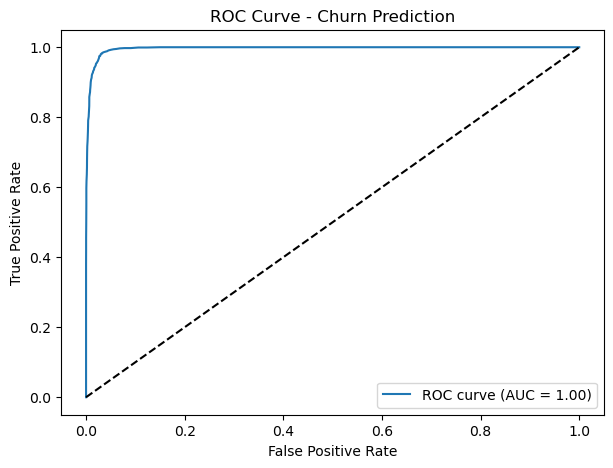

In [39]:
y_prob = model.predict_proba(x_test)[:, 1]
y_prob

fpr, tpr, _ = roc_curve(y_test, y_prob,pos_label='Yes')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Prediction")
plt.legend()
plt.show()

In [40]:
# 1️⃣ Copy original DataFrame
df_results = df.copy()

# 2️⃣ Add new columns
df_results['Actual_readmitted_30_days'] = df['readmitted_30_days']  # actual labels from original data
df_results['Predicted_readmitted_30_days'] = "Part of Training set"
df_results['Predicted_Probability'] = np.nan

# 3️⃣ Get test indices from X_test
test_indices = x_test.index

# 4️⃣ Populate predicted values for test rows only
df_results.loc[test_indices, 'Predicted_readmitted_30_days'] = y_pred
df_results.loc[test_indices, 'Predicted_Probability'] = model.predict_proba(x_test)[:, 1]

# 5️⃣ Inspect
df_results.head(10)
df_results.tail(10)

# 6️⃣ Save to file
df_results.to_csv("Hospital_readmission_FullDataset_Predictions.csv", index=False)
df_results.to_excel("Hospital_readmission_FullDataset_Predictions.xlsx", index=False)

C:\Users\LakshmiSrinivasan\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:148: RuntimeWarning: invalid value encountered in dot
  vecw = np.dot(M, vec.data)
C:\Users\LakshmiSrinivasan\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:150: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0] / w, vecw[1] / w, vecw[2] / w


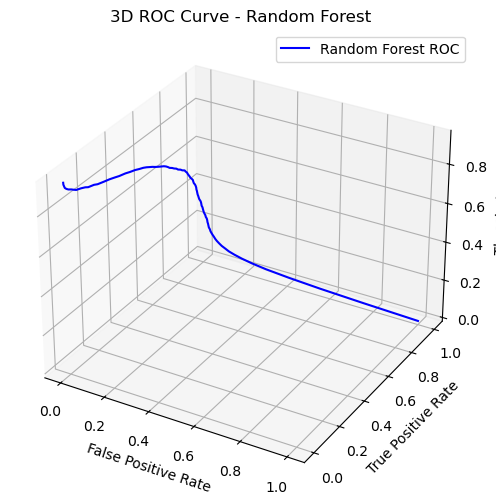

In [15]:
y_prob_rf = model.predict_proba(x_test)[:, 1]

# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf, pos_label='Yes')

# Create 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot FPR, TPR, Thresholds as 3D line
ax.plot(fpr, tpr, thresholds, color='b', label='Random Forest ROC')

# Labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('Threshold')
ax.set_title('3D ROC Curve - Random Forest')
ax.legend()

plt.show()